In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread("./img/travolta_cage.jpg")

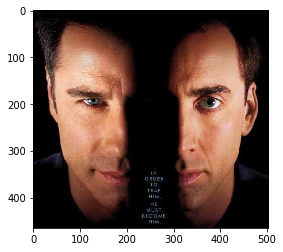

In [3]:
plt.imshow(img[:,:,::-1])

In [4]:
travolta = cv2.imread("img/travolta.jpg")
cage = cv2.imread("img/cage.jpg")

In [5]:
cage.shape

(425, 425, 3)

In [6]:
travolta.shape

(300, 300, 3)

In [7]:
cage = cv2.resize(cage, dsize = (300,300))

## Image pyramids

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_pyramids/py_pyramids.html

In [8]:
low_res_travoltas = [travolta]
t = travolta.copy()
for _ in range(6):
    t = cv2.pyrDown(t)
    low_res_travoltas.append(t)

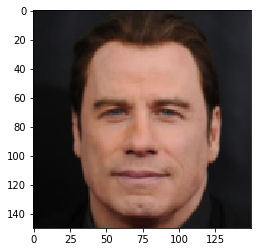

In [9]:
plt.imshow(low_res_travoltas[1][:,:,::-1])

In [10]:
hi_res_travolta = cv2.pyrUp(low_res_travoltas[1])

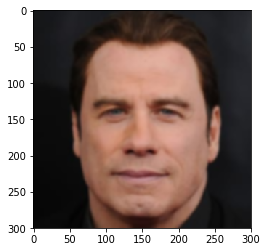

In [11]:
plt.imshow(hi_res_travolta[:,:,::-1])

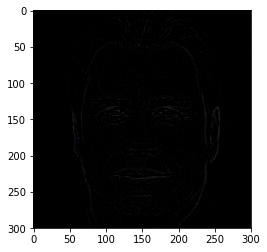

In [12]:
plt.imshow(cv2.subtract(travolta, hi_res_travolta), cmap='binary') # pyrUp reconstructs from a "noisy" deconstruction

By the way the downsampling is done, the sizes can be messed up. This is **not documented in OpenCV**... The workaround is to fix a destination size:

In [13]:
size = (travolta.shape[1], travolta.shape[0])
correct_hi_res_travolta = cv2.pyrUp(low_res_travoltas[1], dstsize=size)

In [14]:
correct_hi_res_travolta.shape

(300, 300, 3)

In [15]:
# 1. Generate Gaussian pyramid
gp_travoltas = [travolta]
t = travolta.copy()
for _ in range(6):
    t = cv2.pyrDown(t)
    gp_travoltas.append(t)
    
    
gp_cages = [cage]
t = cage.copy()
for _ in range(6):
    t = cv2.pyrDown(t)
    gp_cages.append(t)    
    
  

In [16]:
# 2. Find laplacian pyramids (edge matrices)
laplacian_travoltas = [gp_travoltas[5]]

for i in range(5,0,-1):
    size = (gp_travoltas[i-1].shape[1], gp_travoltas[i-1].shape[0])
    reconstructed = cv2.pyrUp(gp_travoltas[i], dstsize = size) # r = reconstruction
    laplacian = cv2.subtract(gp_travoltas[i-1], reconstructed)
    laplacian_travoltas.append(laplacian)
    

In [17]:
reconstructed.shape

(300, 300, 3)

In [18]:
gp_travoltas[i-1].shape

(300, 300, 3)

In [19]:
laplacian_cages = [gp_cages[5]]

for i in range(5,0,-1):
    size = (gp_cages[i-1].shape[1], gp_cages[i-1].shape[0])
    reconstructed = cv2.pyrUp(gp_cages[i], dstsize = size) # r = reconstruction
    laplacian = cv2.subtract(gp_cages[i-1], reconstructed)
    laplacian_cages.append(laplacian)

In [20]:
# Blend

In [21]:
merged = []

for t, c in zip(laplacian_travoltas, laplacian_cages):
    rows, cols, channels = t.shape
    ix = int(cols/2)
    ls = np.hstack((t[:,0:ix,:],c[:,ix:,:]))
    merged.append(ls)

In [22]:
# Reconstruct

In [23]:
ls_ = merged[0]
for i in range(1,6):
    size = (merged[i].shape[1], merged[i].shape[0])
    ls_ = cv2.pyrUp(ls_, dstsize = size)
    ls_ = cv2.add(ls_, merged[i])

In [24]:
merged[i].shape

(300, 300, 3)

In [25]:
ls_.shape

(300, 300, 3)

In [26]:
merged[-1].shape

(300, 300, 3)

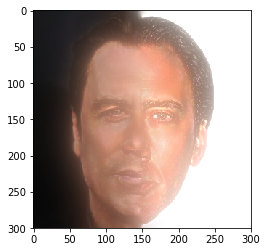

In [27]:
plt.imshow(ls_[:,:,::-1])

How does it compare to just slap half of image to each part?

In [28]:
halves = np.hstack((travolta[:,0:150,:], cage[:,150:,:]))

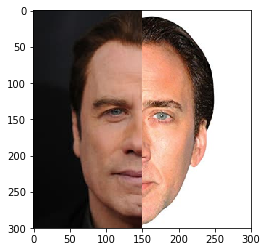

In [29]:
plt.imshow(halves[:,:,::-1])